<a href="https://colab.research.google.com/github/ntntp112/portfolio/blob/master/CSIS3860_Assignment3_300306785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get data from fivethirtyeight github
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')

# Get unique group name
df['Group'].unique()







array(['Acting', 'Comedy', 'Musician', 'Media', nan, 'Politician',
       'Athletics', 'Business', 'Advocacy', 'Political Aide', 'Misc',
       'Academic', 'Government', 'media', 'Clergy', 'Science',
       'Consultant', 'Military'], dtype=object)

In [0]:
# Insert new column to re-define display group
display_group = []

for row in df['Group']:
  # Media Group as m
    if row in ['Media', 'media']:
        display_group.append('m')
  # Acting, Comedy and Music Group as acm 
    elif row in ['Acting','Comedy','Musician']:
        display_group.append('acm')
  # Government and Politician as gp
    elif row in ['Government','Politician','Political Aide']:
        display_group.append('gp')
  # Other to be filter out
    else:
        display_group.append('o')

df['display_group'] = display_group


df.sample(10)


,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,display_group
398,2001,actress,2/22/01,Acting,Kelly Ripa,acm
1755,2009,author,8/18/09,Media,Christopher McDougall,m
806,2003,us senator,9/15/03,Politician,Sen. John Edwards,gp
2589,2014,Documentary Filmmaker,9/3/14,Media,Rory Kennedy,m
1039,2005,Journalist,2/23/05,Media,Peter Jennings,m
127,1999,actress,7/19/99,Acting,Christa Miller,acm
1338,2007,academic,2/12/07,Academic,Jeffrey Rosen,o
2244,2012,actress,8/2/12,Acting,Jessica Biel,acm
151,1999,actor,8/5/99,Acting,Jeffrey Tambor,acm
851,2004,former govrnor of masssachusetts,11/2/04,Politician,William Weld & Al Sharpton,gp


In [0]:
# Create group by for each display group which will be plot to each line
data_group = df.groupby(['display_group','YEAR']).agg({'Raw_Guest_List': 'count'})
data_group


Raw_Guest_List
display_group YEAR                
acm           1999             150
              2000             125
              2001             114
              2002              99
              2003              93
              2004              63
              2005              60
              2006              58
              2007              36
              2008              34
              2009              34
              2010              58
              2011              55
              2012              44
              2013              71
              2014              64
              2015              45
gp            1999               2
              2000              14
              2001               6
              2002              11
              2003              17
              2004              37
              2005              26
              2006              31
              2007              24
              2008              33
              2009              34
              2010              30
              2011              27
...                            ...
m             2003              41
              2004              45
              2005              54
              2006              47
              2007              47
              2008              77
              2009              59
              2010              50
              2011              51
              2012              52
              2013              51
              2014              53
              2015              24
o             1999               3
              2000               9
              2001               6
              2002               7
              2003              15
              2004              19
              2005              22
              2006              25
              2007              34
              2008              20
              2009              36
              2010              27
              2011              30
              2012              35
              2013              23
              2014              25
              2015              14

[68 rows x 1 columns]

In [0]:
# Caculate percentage of total for each group and reset index
pot = data_group.groupby(level=1).apply(lambda x: x/x.sum()*100).reset_index()
pot

,display_group,YEAR,Raw_Guest_List
0,acm,1999,90.361446
1,acm,2000,73.964497
2,acm,2001,72.611465
3,acm,2002,62.264151
4,acm,2003,56.024096
5,acm,2004,38.414634
6,acm,2005,37.037037
7,acm,2006,36.024845
8,acm,2007,25.531915
9,acm,2008,20.731707


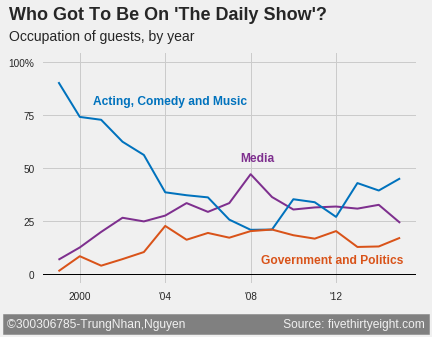

In [0]:
# Visualization
plt.style.use("fivethirtyeight")

# Get acm
df_acm = pot[pot['display_group'] == 'acm']
# Get media
df_m = pot[pot['display_group'] == 'm']
# Get gp
df_gp = pot[pot['display_group'] == 'gp']

# Configuration
line_width = 2
plt.axhline(y=0, color='black', linewidth=1)
color = ['#7E2F8E','#0072BD','#D95319'];


# label
# m
plt.text(x=2007.5, y=53, s='Media', fontsize=12, fontweight='bold',  color=color[0])
# acm
plt.text(x=2000.6, y=80, s='Acting, Comedy and Music', fontsize=12, fontweight='bold', color=color[1])
# gp
plt.text(x=2008.5, y=5, s='Government and Politics', fontsize=12, fontweight='bold',  color=color[2])

# ticks
plt.xticks(np.arange(np.round(pot.YEAR.min(),-3),pot.YEAR.max(),4),['2000','\'04','\'08','\'12','\'16'])
plt.yticks(np.arange(0,105,25),['0','25','50','75','100%'])
plt.ylim(-5,105)
# title
plt.text(x=pot.YEAR.min()-2.3, y=120, s='Who Got To Be On \'The Daily Show\'?', fontsize=18, fontweight='bold')
plt.text(x=pot.YEAR.min()-2.3, y=110, s='Occupation of guests, by year', fontsize=14)

# Footer
plt.text(x=pot.YEAR.min()-2.4, y = -25, s = '©300306785-TrungNhan,Nguyen                             Source: fivethirtyeight.com',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')


# Plot to visualization
# m
plt.plot(df_m['YEAR'], df_m['Raw_Guest_List'], linewidth=line_width, color=color[0])
# acm
plt.plot(df_acm['YEAR'], df_acm['Raw_Guest_List'], linewidth=line_width, color=color[1])
# gp
plt.plot(df_gp['YEAR'], df_gp['Raw_Guest_List'], linewidth=line_width, color=color[2])

# Show
plt.show()